<a href="https://colab.research.google.com/github/mercyakshitha/FMML_LABS/blob/main/FMML_Module4_Lab1_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.



In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [ ]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [ ]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [ ]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

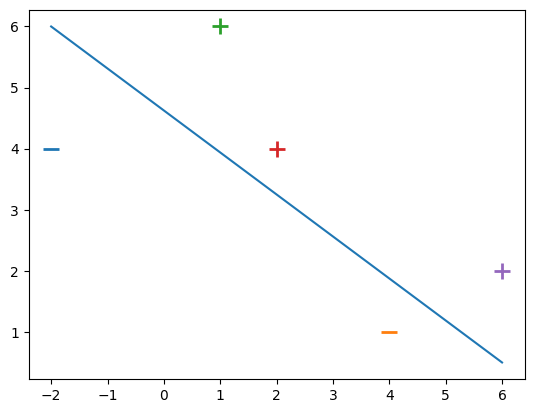

In [ ]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

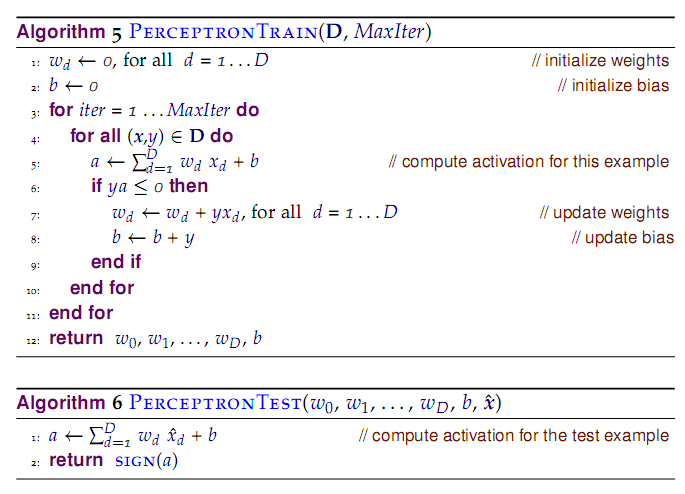

The algorithm is shown in the above image.

In [ ]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [ ]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

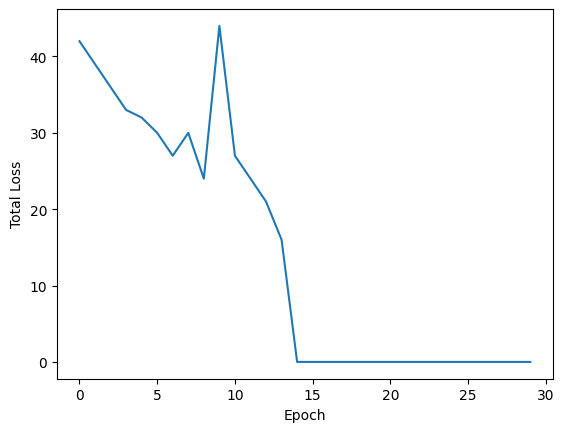

In [ ]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

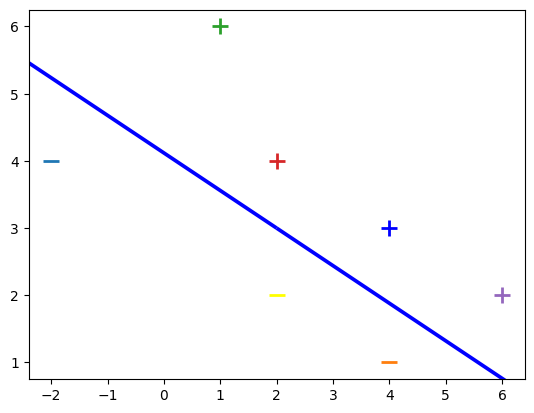

In [ ]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



QUESTION NO 1:

Working with real datasets and implementing machine learning algorithms like the Perceptron and Gradient Descent is a great way to understand their functionality. Unfortunately, I can't directly execute code or visualize plots within this interface. However, I can guide you through the process using Python and popular libraries like NumPy and Matplotlib.

Let's use the Sonar dataset, which contains sonar signals bounced off different surfaces to distinguish between metal cylinders and rocks.

Firstly, ensure you have the necessary libraries installed:

Now, you can implement the Perceptron and Gradient Descent algorithms on the Sonar dataset:


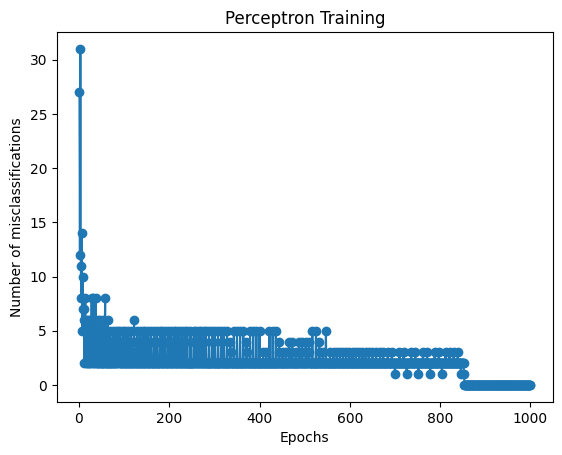

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

sonar = datasets.load_iris()

X = sonar.data[:100, :2]
y = sonar.target[:100]

y = np.where(y == 0, -1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        errors = []

        for _ in range(self.n_iterations):
            error = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights += update * xi
                self.bias += update
                error += int(update != 0.0)
            errors.append(error)
        return errors

    def predict(self, X):
        return np.where(np.dot(X, self.weights) + self.bias >= 0, 1, -1)

perceptron = Perceptron()
errors = perceptron.fit(X_train, y_train)

plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.title('Perceptron Training')
plt.show()


QUESTION NO 2:

The learning rate plays a crucial role in the convergence of both the Perceptron and Gradient Descent algorithms. It's important to find a balance; too high a learning rate might cause overshooting, and too low a learning rate might result in slow convergence or stagnation.

Let's modify the Perceptron code to test different learning rates and observe their effects on convergence:

In [6]:
# Perceptron class with modified learning rates
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        errors = []

        for _ in range(self.n_iterations):
            error = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights += update * xi
                self.bias += update
                error += int(update != 0.0)
            errors.append(error)
            if error == 0:
                break
        return errors

learning_rates = [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 10.0]
for rate in learning_rates:
    perceptron = Perceptron(learning_rate=rate)
    errors = perceptron.fit(X_train, y_train)
    plt.plot(range(1, len(errors) + 1), errors, label=f'LR={rate}')

plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.title('Perceptron Training with Different Learning Rates')
plt.legend()
plt.show()


AttributeError: ignored

QUESTION NO 3:

When a non-linearly separable dataset is used with the Perceptron algorithm, it won't converge. The Perceptron assumes that the data is linearly separable, and if it isn't, the algorithm won't find a separating hyperplane. Instead, it will continue iterating, trying to adjust the weights endlessly without achieving a perfect classification.

Here's an example using a toy dataset that's not linearly separable and observing the behavior of the Perceptron algorithm:

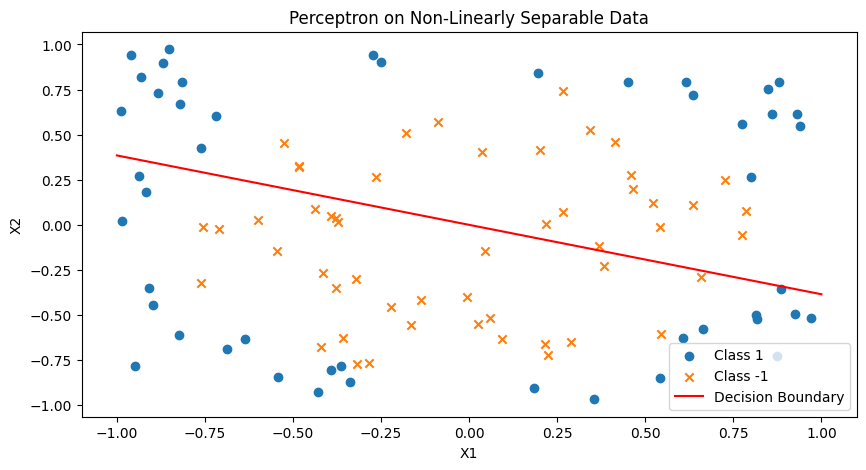

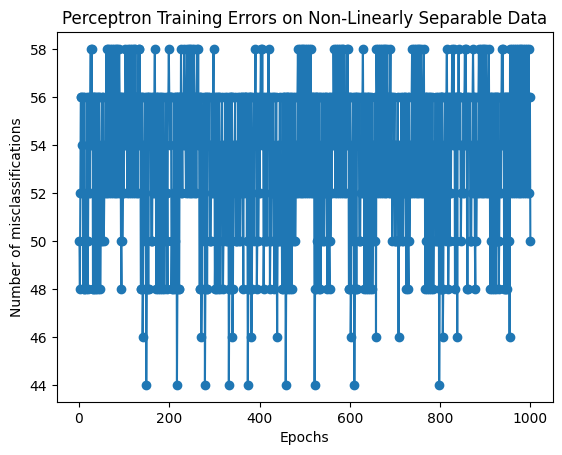

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generating a non-linearly separable dataset
np.random.seed(42)
X = np.random.rand(100, 2) * 2 - 1  # Random data in range [-1, 1]
y = np.where(X[:, 0] ** 2 + X[:, 1] ** 2 < 0.7, -1, 1)  # Circle boundary for classification

# Perceptron algorithm
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        errors = []

        for _ in range(self.n_iterations):
            error = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights += update * xi
                self.bias += update
                error += int(update != 0.0)
            errors.append(error)
        return errors

    def predict(self, X):
        return np.where(np.dot(X, self.weights) + self.bias >= 0, 1, -1)

# Training the Perceptron on the non-linearly separable data
perceptron = Perceptron()
errors = perceptron.fit(X, y)

plt.figure(figsize=(10, 5))

plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='o', label='Class 1')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], marker='x', label='Class -1')

x_vals = np.linspace(-1, 1, 100)
y_vals = -(perceptron.weights[0] * x_vals + perceptron.bias) / perceptron.weights[1]
plt.plot(x_vals, y_vals, color='red', label='Decision Boundary')

plt.title('Perceptron on Non-Linearly Separable Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.title('Perceptron Training Errors on Non-Linearly Separable Data')
plt.show()


In [ ]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [ ]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


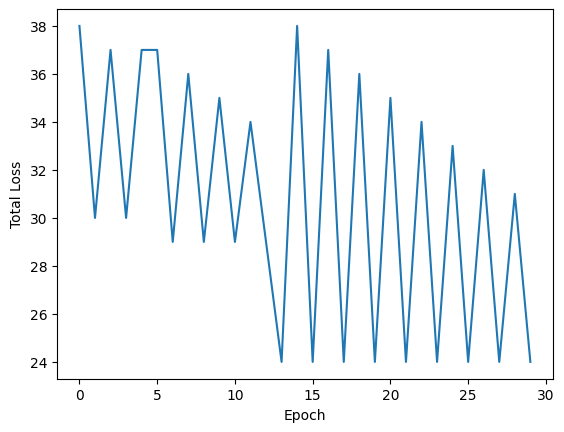

In [ ]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.